In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [8]:
#Linear Regression

# Initialize some X,y,w,b

X = np.array([1,3,4])
y = np.array([2,4,8])

print("X=", X, X.shape[0])
print("y=", y, y.shape)

X= [1 3 4] 3
y= [2 4 8] (3,)


In [3]:
#Assuming weight and bias
w = 1.5
b = 1

In [4]:
#Predict y_hat
def predict_y(X,w,b):
	m = X.shape[0]
	y_hat = np.zeros(m)

	for i in range(m):
		y_hat[i] = (w*X[i]) + b
	
	return y_hat

In [9]:
predict_y(X, w, b), y

(array([2.5, 5.5, 7. ]), array([2, 4, 8]))

In [12]:
def plot_true_pred(X,y,w,b):
	y_hat = predict_y(X,w,b)
	plt.figure(figsize=(4,3))
	plt.scatter(X,y,label="y_true")
	plt.plot(X, y_hat, label="y_hat")
	plt.title("y_true vs y_hat")
	plt.legend()

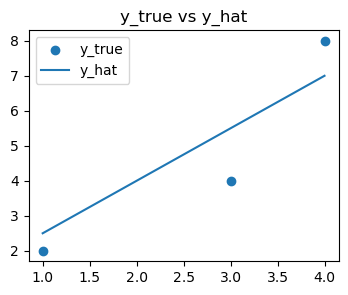

In [13]:
plot_true_pred(X,y,w,b)

In [14]:
#MSE Cost function
y_hat = predict_y(X,w,b)
print(y)
print(y_hat)

[2 4 8]
[2.5 5.5 7. ]


In [15]:
def MSE(y, y_hat):
	data_shape = y.shape[0]
	square_error_sum = 0
	for i in range(data_shape):
		square_error_sum += (y[i]-y_hat[i])**2

	return (square_error_sum/(2*data_shape))  

In [16]:
MSE(y, y_hat)

0.5833333333333334

In [28]:
print("X=",X)
print(type(X))
print("Y=",y)
print(type(y))

X= [1 3 4]
<class 'numpy.ndarray'>
Y= [2 4 8]
<class 'numpy.ndarray'>


In [29]:
#Gradient Descent
def gradient(X,y,w,b):
	m = X.shape[0]

	dj_dw = 0
	dj_db = 0

	for i in range(m):
		error = w*X[i] + b - y[i]
		dj_dw += 2*(error * X[i])
		dj_db += 2*(error)

	dj_dw = dj_dw/m
	dj_db = dj_db/m

	return dj_dw, dj_db


In [31]:
alpha = 0.01

dj_dw, dj_db = gradient(X,y,w,b)

w_new = w - alpha*dj_dw
b_new = b - alpha*dj_db

MSE(y, predict_y(X,w_new,b_new))

0.5792222222222222

In [32]:
print("Cost before gradient descent", MSE(y, predict_y(X,w,b)))
print("Cost after gradient descent", MSE(y, predict_y(X,w_new,b_new)))

Cost before gradient descent 0.5833333333333334
Cost after gradient descent 0.5792222222222222


In [58]:
def gradient_descent(X, y, w, b, iter=2000, alpha = 0.01, history_intervals=100):
	history = {}
	for i in range(iter):
		dj_dw, dj_db = gradient(X,y,w,b)
		w = w - alpha*dj_dw
		b = b - alpha*dj_db
		history[i]=MSE(y, predict_y(X,w,b))

		if i % history_intervals == 0 :
			print(f"Epoch {i} | Cost {history[i]}")

	return w, b, history


In [59]:
w_new, b_new, history = gradient_descent(X, y, w, b)

Epoch 0 | Cost 0.5792222222222222
Epoch 100 | Cost 0.5036330031480194
Epoch 200 | Cost 0.46752883600499623
Epoch 300 | Cost 0.4487905567006474
Epoch 400 | Cost 0.4390652773472457
Epoch 500 | Cost 0.43401779902944004
Epoch 600 | Cost 0.431398127507119
Epoch 700 | Cost 0.43003850227393065
Epoch 800 | Cost 0.4293328486227111
Epoch 900 | Cost 0.4289666101451328
Epoch 1000 | Cost 0.4287765301785274
Epoch 1100 | Cost 0.4286778775357371
Epoch 1200 | Cost 0.4286266762223982
Epoch 1300 | Cost 0.4286001024336637
Epoch 1400 | Cost 0.4285863104779179
Epoch 1500 | Cost 0.42857915237015987
Epoch 1600 | Cost 0.4285754372692985
Epoch 1700 | Cost 0.4285735091096677
Epoch 1800 | Cost 0.4285725083832541
Epoch 1900 | Cost 0.428571989000243


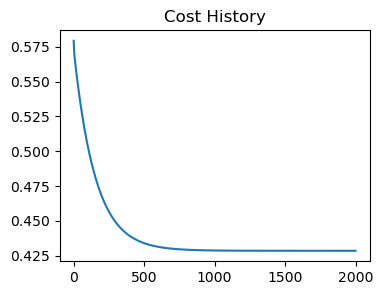

In [60]:
def plot_history(history):
	plt.figure(figsize=(4,3))
	plt.plot(history.keys(), history.values())
	plt.title("Cost History")
	plt.show()

plot_history(history)

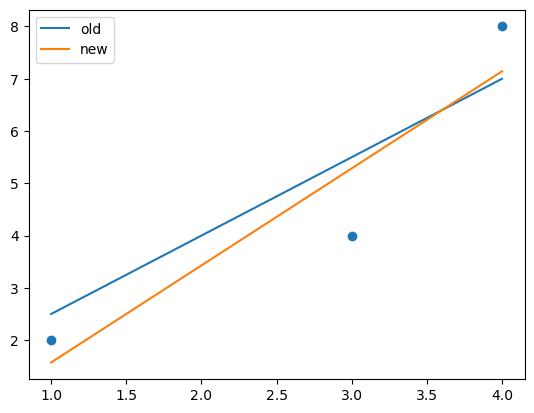

In [61]:
## Model Evaluation
y_hat_old = predict_y(X,w,b)
y_hat_new = predict_y(X,w_new,b_new)

plt.scatter(X, y)
plt.plot(X, y_hat_old, label="old")
plt.plot(X, y_hat_new, label="new")
plt.legend()


